In [258]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [259]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'GOOG', 'MSFT']

In [260]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [263]:
news_tables.items()

dict_items([('AMZN', <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer news-table" id="news-table" width="100%">
<tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'Investor\u0027s Business Daily', 'https://finance.yahoo.com/m/8359ab21-f897-391c-b788-0226d96c51c1/is-amazon-stock-a-buy%3F-tech.html');">
<td align="right" width="130">
            Today 08:30AM
        </td>
<td align="left">
<div class="news-link-container">
<div class="news-link-left">
<a class="tab-link-news" href="https://finance.yahoo.com/m/8359ab21-f897-391c-b788-0226d96c51c1/is-amazon-stock-a-buy%3F-tech.html" rel="nofollow" target="_blank">Is Amazon Stock A Buy? Tech Giant Named A Top 2025 Pick</a>
</div>
<div class="news-link-right">
<span>(Investor's Business Daily)</span></div></div></td></tr>
<tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'Motley Fool', 'https://finance.yahoo.com/m/6daeb419-316f-3b73-b2c7-d59204df8e1c/2-stocks-set-to-dominate

In [262]:
from datetime import datetime

In [264]:
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):

        # Extract the title
        if row.a:
            title = row.a.text.strip()  # Clean the title of extra whitespace
        else:
            title = ""

        # Extract the date and time from the row's first td element
        if row.td:
            date_data = row.td.text.strip()

            # Debugging: print the raw date_data for each row
            print(f"Raw date_data: '{date_data}'")

            # Split the date_data on spaces if it's available
            date_data_parts = date_data.split(' ')

            if len(date_data_parts) == 1:
                # Only time is available, set date to empty
                time = date_data_parts[0]
                date = ""
            elif len(date_data_parts) == 2:
                # Date and time are available
                date = date_data_parts[0]
                time = date_data_parts[1]
            else:
                # If there's no date or time, set both to empty
                date = time = ""
        else:
            date = time = ""

        # Append the parsed data to the list
        parsed_data.append([ticker, date, time, title])

# Print the parsed_data to verify the result
print(parsed_data)


Raw date_data: 'Today 08:30AM'
Raw date_data: '08:15AM'
Raw date_data: '07:52AM'
Raw date_data: '07:21AM'
Raw date_data: '07:00AM'
Raw date_data: '07:00AM'
Raw date_data: '07:00AM'
Raw date_data: '06:00AM'
Raw date_data: '06:00AM'
Raw date_data: '05:56AM'
Raw date_data: '05:50AM'
Raw date_data: '05:30AM'
Raw date_data: '05:00AM'
Raw date_data: '05:00AM'
Raw date_data: '04:57AM'
Raw date_data: '04:25AM'
Raw date_data: '01:51AM'
Raw date_data: '01:51AM'
Raw date_data: '01:45AM'
Raw date_data: '01:38AM'
Raw date_data: 'Dec-17-24 04:39PM'
Raw date_data: '03:41PM'
Raw date_data: '03:30PM'
Raw date_data: '03:23PM'
Raw date_data: '03:17PM'
Raw date_data: '02:46PM'
Raw date_data: '02:43PM'
Raw date_data: '02:42PM'
Raw date_data: '02:41PM'
Raw date_data: '01:02PM'
Raw date_data: '11:10AM'
Raw date_data: '11:00AM'
Raw date_data: '10:48AM'
Raw date_data: '10:48AM'
Raw date_data: '08:17AM'
Raw date_data: '08:13AM'
Raw date_data: '07:33AM'
Raw date_data: '07:00AM'
Raw date_data: '06:40AM'
Raw date_

In [265]:
from datetime import datetime, timedelta

# Assuming parsed_data is a list of lists, where each inner list is [ticker, date, ...other fields]

# Get today's date
today_date = datetime.today().strftime('%Y-%m-%d')

# Sort parsed_data by ticker to group entries for the same ticker together (optional)
parsed_data.sort(key=lambda x: x[0])  # Sort by ticker

# Initialize a dictionary to track the last date used for each ticker
ticker_dates = {}

# Step 1: Fill missing dates sequentially for each ticker
start_date = datetime.today()  # Today's date for starting the filling

for idx, row in enumerate(parsed_data):
    ticker = row[0]
    date = row[1]

    if date == "":  # If date is missing, assign a sequential date
        # Get the last date used for this ticker
        if ticker not in ticker_dates:
            ticker_dates[ticker] = start_date  # Start from today for each ticker

        # Assign the same date for all rows of the same ticker
        current_date = ticker_dates[ticker]
        row[1] = current_date.strftime('%Y-%m-%d')  # Format the date as 'YYYY-MM-DD'

        # Update the last date for this ticker (increment by 1 day)
        ticker_dates[ticker] += timedelta(days=1)

    elif date == "Today":  # Replace "Today" with today's actual date
        row[1] = today_date

# Print the updated parsed_data to verify the result
for row in parsed_data:
    print(row)


['AMZN', '2024-12-18', '08:30AM', 'Is Amazon Stock A Buy? Tech Giant Named A Top 2025 Pick']
['AMZN', '2024-12-18', '08:15AM', '2 Stocks Set to Dominate in 2025']
['AMZN', '2024-12-19', '07:52AM', 'Is Amazon.com (AMZN) Among Billionaire Daniel Sundheims Stock Picks Heading Into 2025?']
['AMZN', '2024-12-20', '07:21AM', 'Honest Company downgraded to Hold from Buy at Loop Capital']
['AMZN', '2024-12-21', '07:00AM', 'Teamsters have some legal issues to overcome after wins at Amazon and with DSPs']
['AMZN', '2024-12-22', '07:00AM', '']
['AMZN', '2024-12-23', '07:00AM', 'Cloud AI Startup Vultr Raises $333 Million at $3.5 Billion Valuation']
['AMZN', '2024-12-24', '06:00AM', "Big Tech is dominating the market once again  and that's probably just fine: Morning Brief"]
['AMZN', '2024-12-25', '06:00AM', "Nvidia's Blackwell chip could push the company into a new stratosphere as the AI revolution continues"]
['AMZN', '2024-12-26', '05:56AM', 'AT&T is dumping hybrid work as it follows Amazon in de

In [266]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df

,ticker,date,time,title
0,AMZN,2024-12-18,08:30AM,Is Amazon Stock A Buy? Tech Giant Named A Top ...
1,AMZN,2024-12-18,08:15AM,2 Stocks Set to Dominate in 2025
2,AMZN,2024-12-19,07:52AM,Is Amazon.com (AMZN) Among Billionaire Daniel ...
3,AMZN,2024-12-20,07:21AM,Honest Company downgraded to Hold from Buy at ...
4,AMZN,2024-12-21,07:00AM,Teamsters have some legal issues to overcome a...
...,...,...,...,...
304,MSFT,2025-03-19,10:33AM,There's only 2 Magnificent 7 names this strate...
305,MSFT,2025-03-20,10:21AM,"Apple, Microsoft, and Nvidia Will Be Worth $4 ..."
306,MSFT,2025-03-21,09:57AM,Microsoft expects $800M charge after GM killed...
307,MSFT,2025-03-22,09:48AM,S&P 500 Nuclear Leader Constellation Energy To...


In [267]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [268]:
vader = SentimentIntensityAnalyzer()

In [269]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, errors='coerce')


<ipython-input-269-1cfcffb8d069>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, errors='coerce')


In [270]:
df

,ticker,date,time,title,compound
0,AMZN,2024-12-18,08:30AM,Is Amazon Stock A Buy? Tech Giant Named A Top ...,0.3612
1,AMZN,2024-12-18,08:15AM,2 Stocks Set to Dominate in 2025,-0.1280
2,AMZN,2024-12-19,07:52AM,Is Amazon.com (AMZN) Among Billionaire Daniel ...,0.0000
3,AMZN,2024-12-20,07:21AM,Honest Company downgraded to Hold from Buy at ...,0.5106
4,AMZN,2024-12-21,07:00AM,Teamsters have some legal issues to overcome a...,0.7096
...,...,...,...,...,...
304,MSFT,2025-03-19,10:33AM,There's only 2 Magnificent 7 names this strate...,0.7717
305,MSFT,2025-03-20,10:21AM,"Apple, Microsoft, and Nvidia Will Be Worth $4 ...",0.2263
306,MSFT,2025-03-21,09:57AM,Microsoft expects $800M charge after GM killed...,-0.6705
307,MSFT,2025-03-22,09:48AM,S&P 500 Nuclear Leader Constellation Energy To...,0.6597


In [271]:
# Display data types of all columns in the DataFrame
print(df.dtypes)


ticker              object
date        datetime64[ns]
time                object
title               object
compound           float64
dtype: object


In [272]:
df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True, errors='coerce')
df['time_numeric'] = df['time'].dt.hour * 3600 + df['time'].dt.minute * 60 + df['time'].dt.second
df['time'] = df['time'].dt.strftime('%H:%M:%S')



<ipython-input-272-fb6e1bf40e56>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True, errors='coerce')
<ipython-input-272-fb6e1bf40e56>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True, errors='coerce')


In [273]:
# Display data types of all columns in the DataFrame
print(df.dtypes)


ticker                  object
date            datetime64[ns]
time                    object
title                   object
compound               float64
time_numeric             int32
dtype: object


In [274]:
df

,ticker,date,time,title,compound,time_numeric
0,AMZN,2024-12-18,08:30:00,Is Amazon Stock A Buy? Tech Giant Named A Top ...,0.3612,30600
1,AMZN,2024-12-18,08:15:00,2 Stocks Set to Dominate in 2025,-0.1280,29700
2,AMZN,2024-12-19,07:52:00,Is Amazon.com (AMZN) Among Billionaire Daniel ...,0.0000,28320
3,AMZN,2024-12-20,07:21:00,Honest Company downgraded to Hold from Buy at ...,0.5106,26460
4,AMZN,2024-12-21,07:00:00,Teamsters have some legal issues to overcome a...,0.7096,25200
...,...,...,...,...,...,...
304,MSFT,2025-03-19,10:33:00,There's only 2 Magnificent 7 names this strate...,0.7717,37980
305,MSFT,2025-03-20,10:21:00,"Apple, Microsoft, and Nvidia Will Be Worth $4 ...",0.2263,37260
306,MSFT,2025-03-21,09:57:00,Microsoft expects $800M charge after GM killed...,-0.6705,35820
307,MSFT,2025-03-22,09:48:00,S&P 500 Nuclear Leader Constellation Energy To...,0.6597,35280


<Figure size 20000x12000 with 0 Axes>

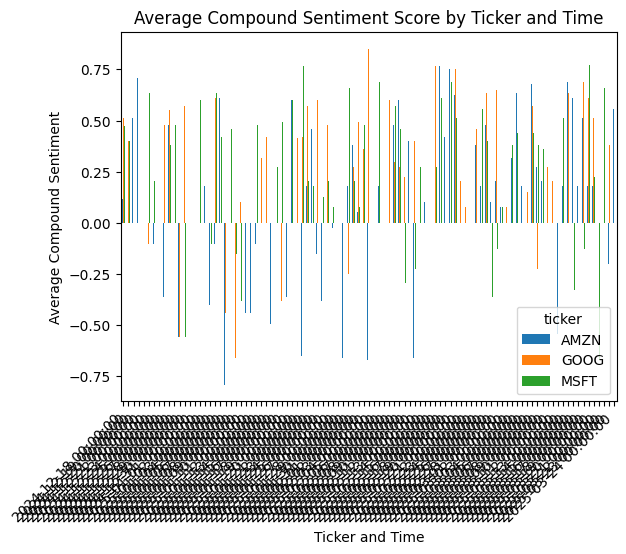

In [275]:

import matplotlib.pyplot as plt

# Group by 'ticker' and 'time_numeric', then compute the mean only for the 'compound' column
mean_df = df.groupby(['date', 'ticker'])['compound'].mean().unstack()
# Plotting the data
plt.figure(figsize=(200,120))
mean_df.plot(kind='bar')
plt.title('Average Compound Sentiment Score by Ticker and Time')
plt.xlabel('Ticker and Time')
plt.xticks(rotation=45, ha='right')

plt.ylabel('Average Compound Sentiment')
plt.show()


<Figure size 2000x1200 with 0 Axes>

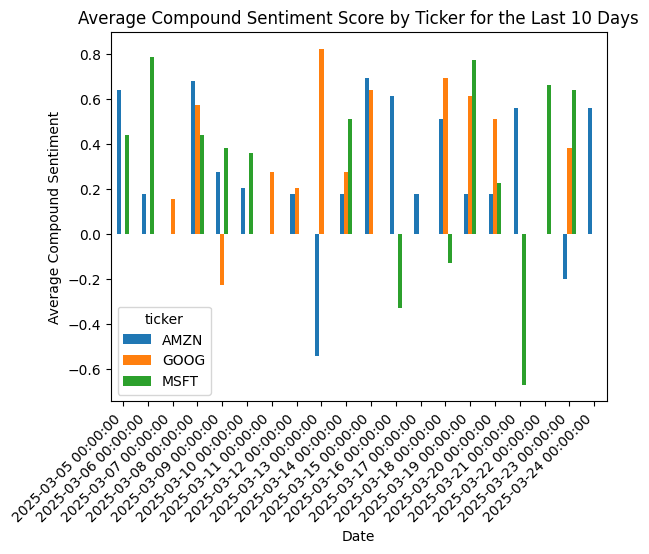

In [276]:
last_10_days = df['date'].drop_duplicates().sort_values(ascending=False).head(20)

# Filter the data to include only rows from these last 10 days
filtered_df = df[df['date'].isin(last_10_days)]

# Group by 'date' and 'ticker' to calculate the mean of 'compound' for each day
mean_df = filtered_df.groupby(['date', 'ticker'])['compound'].mean().unstack()

# Plotting the data
plt.figure(figsize=(20,12))
mean_df.plot(kind='bar')

# Set the title and labels
plt.title('Average Compound Sentiment Score by Ticker for the Last 10 Days')
plt.xlabel('Date')
plt.ylabel('Average Compound Sentiment')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()